In [2]:
import os, sys
import toml
from src import settings
import pandas as pd
import seaborn as sns
from src.utils import fileio
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


INPUT_PATH = os.path.join(settings.RESULTS_DIR, "local_measures")

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)


all_treatments = fileio.load_multiple_folders(INPUT_PATH)
all_treatments = {key: value for key, value in all_treatments.items() if key in config["TREATMENTS"]}

treatment_dataframes = []
for treatment_name, treatment_path in all_treatments.items():
    all_groups = fileio.load_files_from_folder(treatment_path)
    group_dataframes = []
    for group_name, df_path in all_groups.items():
        df = pd.read_csv(df_path, index_col=0)
        df["Group"] = group_name.replace(".csv", "")
        group_dataframes.append(df)

    df = pd.concat(group_dataframes)
    df.set_index("Group", append=True, inplace=True)
    df["Treatment"] = treatment_name
    df.set_index("Treatment", append=True, inplace=True)

    treatment_dataframes.append(df)


df = pd.concat(treatment_dataframes)
df.reset_index(inplace=True)

drop_cols = [
    "Degree centrality",
    "In-degree centrality",
    "Out-degree centrality",
    "Closeness centrality",
    "In-degree",
    "Out-degree",
    "Selectivity",
    "Betweenness centrality w=None",
    "Betweenness centrality w=count",
    "Betweenness centrality w=duration(seconds)",
    "PageRank centrality",
    "Clustering coefficient w=None",
]

df = df.drop(columns=drop_cols)

df.reset_index(drop=True, inplace=True)
df.reset_index(inplace=True)
df.rename(columns={"level_0": "Fly"}, inplace=True)
path = "/home/milky/drosophila-SNA/data/results/xls/distance_traveled.xlsx"
df_distance = pd.read_excel(path)

df = pd.merge(df, df_distance, on=["Fly", "Group", "Treatment"], how="left")


features = [
    "In-Strength distribution, w=count",
    "Out-Strength distribution, w=count",
    "In-Strength distribution, w=duration",
    "Out-Strength distribution, w=duration",
    "Weighted Degree (count)",
    "Weighted Degree (duration(seconds))",
    "Clustering coefficient w=count",
    "Clustering coefficient w=duration(seconds)",
    "Weighted Degree (count)",
    "Weighted Degree (duration(seconds))",
]

x = df.loc[:, features].values
y = df.loc[:, ["Treatment"]].values

x = StandardScaler().fit_transform(x)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data=principalComponents, columns=["principal component 1", "principal component 2"])

finalDf = pd.concat([principalDf, df[["Treatment"]]], axis=1)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("Principal Component 1", fontsize=15)
ax.set_ylabel("Principal Component 2", fontsize=15)
ax.set_title("2 component PCA", fontsize=20)

ax.spines["left"].set_visible(True)
ax.spines["bottom"].set_visible(True)

targets = ["CS_10D", "CsCh", "Cs_5DIZ", "LDA_5DIZ", "OCT_5DIZ", "LDA_OCT_5DIZ"]
colors = sns.color_palette("Set2", 6)
for target, color in zip(targets, colors):
    indicesToKeep = finalDf["Treatment"] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, "principal component 1"],
        finalDf.loc[indicesToKeep, "principal component 2"],
        c=color,
        s=50,
    )

ax.legend(targets)
ax.grid(True)

ax.axhline(0, color="black", linewidth=0.8)
ax.axvline(0, color="black", linewidth=0.8)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/home/milky/drosophila-SNA/data/results/xls/distance_traveled.xlsx'

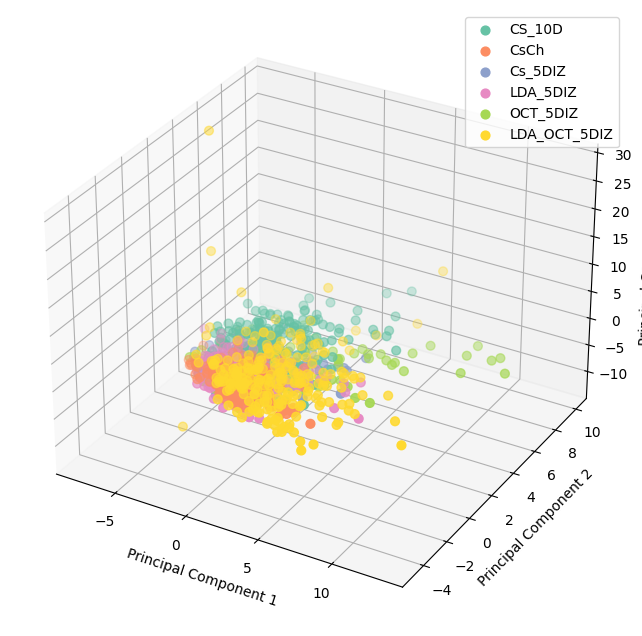

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library

x = df.loc[:, features].values
y = df.loc[:, ["Treatment"]].values

x = StandardScaler().fit_transform(x)

# Modify PCA to compute three components
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

# Update principalDf with three components
principalDf = pd.DataFrame(
    data=principalComponents, columns=["principal component 1", "principal component 2", "principal component 3"]
)

finalDf = pd.concat([principalDf, df[["Treatment"]]], axis=1)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection="3d")  # Creating a 3D plot

for target, color in zip(targets, colors):
    indicesToKeep = finalDf["Treatment"] == target
    ax.scatter(
        finalDf.loc[indicesToKeep, "principal component 1"],
        finalDf.loc[indicesToKeep, "principal component 2"],
        finalDf.loc[indicesToKeep, "principal component 3"],
        c=[color],
        label=target,
        s=40,
    )

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.legend(targets)
plt.show()

In [8]:
df.columns

Index(['index', 'Fly', 'Group', 'Treatment', 'Eigenvector centrality',
       'In-Strength distribution, w=count',
       'Out-Strength distribution, w=count',
       'In-Strength distribution, w=duration',
       'Out-Strength distribution, w=duration', 'Weighted Degree (count)',
       'Weighted Degree (duration(seconds))', 'Clustering coefficient w=count',
       'Clustering coefficient w=duration(seconds)', 'Distance'],
      dtype='object')